<a href="https://colab.research.google.com/github/Alexander-1380/Yandex_practicum/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D0%BE%D0%B2_A_B_%D1%82%D0%B5%D1%81%D1%82%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ результатов A/B-теста (проект выполнен в рамках обучения в Яндекс Практикуме)

# Описание данных

### Данные для первой части

Файл /datasets/hypothesis.csv.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


### Данные для второй части

Файл /datasets/orders.csv.
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


### Описание проекта

### Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

### Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br>
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br>
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.<br>

## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### Задача
Проанализируйте A/B-тест:<br>
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.<br>
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.<br>
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.<br>
Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.<br>
Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.<br>
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.<br>
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.<br>
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.<br>
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.<br>
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.<br>
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.<br>
Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.<br>
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.<br>

Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Часть 1. Приоритизация гипотез.

In [ ]:
# загружаем необходимые в проекте библиотеки

import pandas as pd
import datetime as dt
# from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import math as mth

In [ ]:
# загружаем данные

try:
    hypothesis = pd.read_csv('/Users/alexander/Jupiter Notebooks/YandexCourse/Sprint13_project/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')


# выведем данные и информацию о датафрейме
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Так как таблица небольшая, и всю ее видно при выводе, не будем проверять на пропуски и дубликаты. Типы данных столбцов соответствуют их содержанию. Для выдержания стиля приведем названия столбцов к нижнему регистру и на том окончим предобработку данных.

In [ ]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


## 1.1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [ ]:
# добавим в датафрейм новый столбец со значением ICE по формуле impact * confidence / efforts
# выведем результаты по убыванию значения

hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']), 2)

display(hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


## 1.2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета

In [ ]:
# добавим в датафрейм новый столбец со значением RICE по формуле reach * impact * confidence / efforts
# выведем результаты по убыванию значения

#pd.set_option('display.max_colwidth', None)

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


## 1.3. Общий вывод по Части 1:

Приоритизация гипотез с помощью фреймворка ICE поставила на первое место гипотезу №8, затем №0 и №7.

Приоритизация гипотез с помощью фреймворка RICE поставила на первое место гипотезу №7, затем №2 и №0.
При этом приоретизация гипотезы 7 по RICE в два раза выше своего ближайшего конкурента, по ICE мы не наблюдали такой значительной разницы.

Так произошло потому как фреймворк RICE учитывает вес параметра Reach — количество пользователей, которых затронет предлагаемое изменение. При этом у гипотезы №7 максимальный охват (10), а у гипотезы №8 минимальный (1), это в основном и повлияло на результат.

Рекомендовано сосредоточиться на проверке гипотез в порядке согласно приоретизации по фреймворку RICE, так как нельзя игнорировать охват пользователей.

# Часть 2. Анализ A/B-теста

In [ ]:
# загружаем данные

try:
    orders = pd.read_csv('/Users/alexander/Jupiter Notebooks/YandexCourse/Sprint13_project/orders.csv')
    visitors = pd.read_csv('/Users/alexander/Jupiter Notebooks/YandexCourse/Sprint13_project/visitors.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')


data_list = [orders, visitors]

# выведем данные и информацию о датафрейме
for df in data_list:
    display(df.head())
    df.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# пропусков в данных не наблюдается.
# проверим на дубликаты

for df in data_list:
    print(df.duplicated().sum())

0
0


In [ ]:
# дубликатов в данных не наблюдается.
# приведем столбцы с датами к нужному формату

for df in data_list:
    df['date'] = df['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
    df.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB



In [ ]:
# посмотрим на количество групп в AB тесте

for df in data_list:
    display(df['group'].unique())
    print('дата начала теста: ', df['date'].min())
    print('дата окончания теста: ', df['date'].max())

# найдем количество уникальных пользователей
print('количество уникальных пользователей: ', orders['visitorId'].nunique())

# найдем количество уникальных пользователей в каждой группе:
display(orders[['group', 'visitorId']].groupby('group').nunique())

array(['B', 'A'], dtype=object)

дата начала теста:  2019-08-01 00:00:00
дата окончания теста:  2019-08-31 00:00:00


array(['A', 'B'], dtype=object)

дата начала теста:  2019-08-01 00:00:00
дата окончания теста:  2019-08-31 00:00:00
количество уникальных пользователей:  1031


,visitorId
group,
A,503
B,586


Выяснили, что у нас всего две группы - A и B. <br>
Дата начала теста:  2019-08-01. <br>
Дата окончания теста:  2019-08-31. <br>
Количество уникальных пользователей в двух группах  1031 человек. <br>
При этом количество уникальных пользователей в каждой группе в сумме дают бОльшее число - значит некоторые пользователи попали в обе группы. <br>

In [ ]:
# найдем пользователей, попавших в обе группы. Для этого к отфильтрованному по группе A датафрейму orders
# присоединим тот же датафрейм orders, но отфильтрованноый по группе B.
# соединение по столбцу visitorId с параметром inner (только попавшие в оба фильтра пользователи).
# В итоговой таблице посчитаем количество уникальных пользователей.

orders[orders['group']=='A'].merge(orders[orders['group']=='B'], on='visitorId', how='inner')['visitorId'].nunique()

58

58 пользователей каким-то образом попали в обе группы. Не будем исключать их из заказов, так как в этом случае таблица orders будет участовать в дальнейшем исследовании без учета этой группы, а таблица visitors все равно останется с учетом этой группы, так как из нее невозможно исключить конкретных пользователей.

### Вывод по предобработке данных:
Прочитали два датафрейма, пропусков в данных нет, дубликатов нет, формат после обработки столбцов с датами соответсвует содержанию.<br>

В AB тесте участвовали всего две группы - A и B. <br>
Дата начала теста:  2019-08-01. <br>
Дата окончания теста:  2019-08-31. <br>
Количество уникальных пользователей в двух группах  1031 человек. <br>
При этом 58 пользователей каким-то образом попали в обе группы. Не будем исключать их из заказов, так как в этом случае таблица orders будет участовать в дальнейшем исследовании без учета этой группы, а таблица visitors все равно останется с учетом этой группы, так как из нее невозможно исключить конкретных пользователей. Предположим, что 58/1031 = 5,6% не окажут существенного влияния на результаты исследования <br>

## 2.1 Построим график кумулятивной выручки по группам.

In [ ]:
# Построим график кумулятивной выручки по группам.

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


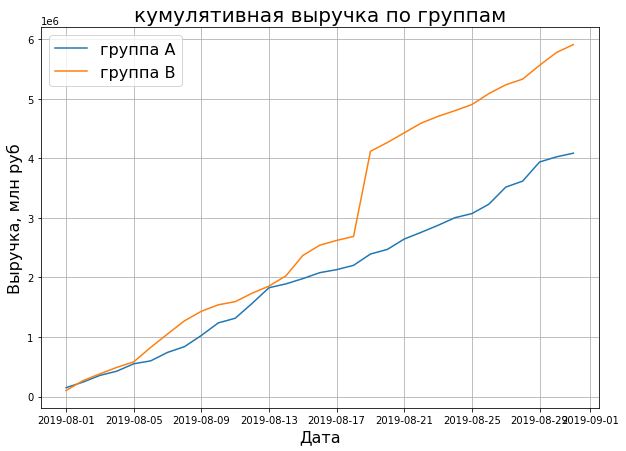

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=[10, 7])

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')

plt.title('кумулятивная выручка по группам', fontsize=20)
plt.xlabel("Дата", fontsize=16)
plt.ylabel("Выручка, млн руб", fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

### Вывод:
Наблюдаем:
- выручка увеличивается в течение всего теста в обеих группах
- выручка группы B примерно с середины теста выручка больше
- на графиках присутствует резкий скачек в группе B районе 18-19 августа, возможно были аномальные скачки числа покупателей либо суммы покупок (нужно проверить выбросы в выборке)


## 2.2. Построим график кумулятивного среднего чека по группам.

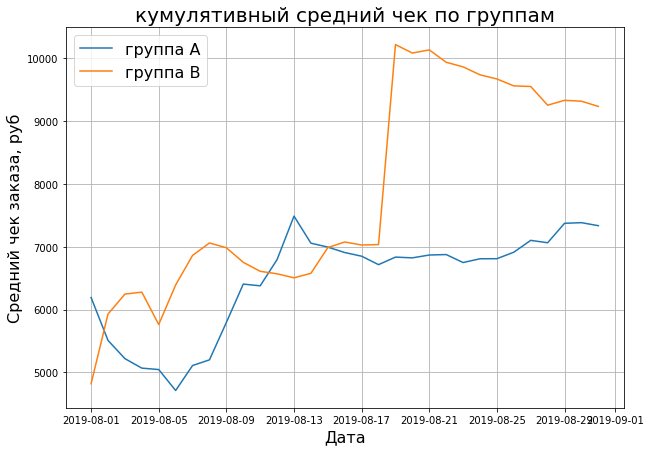

In [ ]:
# Построим график кумулятивного среднего чека по группам.

plt.figure(figsize=[10, 7])
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.title('кумулятивный средний чек по группам', fontsize=20)
plt.xlabel("Дата", fontsize=16)
plt.ylabel("Средний чек заказа, руб", fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

### Вывод:
- средний чек для группа A становится равномерным после локального пика 2019-08-13
- средний чек для группы B делает очень большой скачек 2019-08-18, затем идет на снижение.

Возможно в этот период был аномально дорогой заказ.
Возможно, средний чек для группы B еще не установился возле своего среднего значения.

## 2.3. Построим график относительного различия для среднего чека группы B к группе A

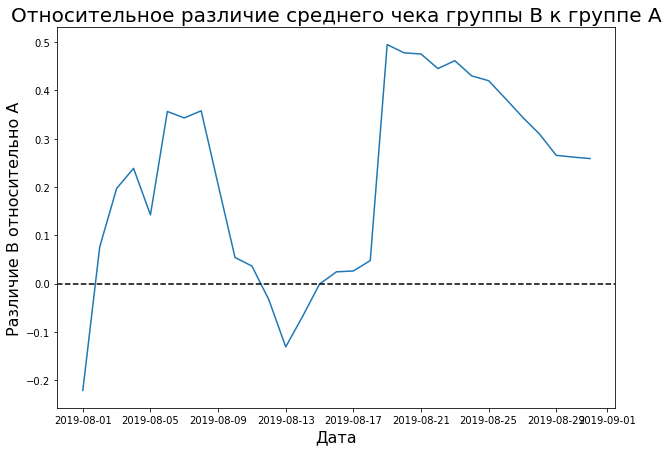

In [ ]:
# Построим график относительного различия для среднего чека группы B к группе A.
# Добавим горизонтальную ось y=0 методом axhline()

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=[10, 7])
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Относительное различие среднего чека группы B к группе A', fontsize=20)
plt.xlabel("Дата", fontsize=16)
plt.ylabel("Различие B относительно A", fontsize=16)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

### Вывод:
Видим, как средний чек группы B становится больше чем для группы A, затем падает обратно в зону меньше чем у группы A, затем резко возрастает и становится больше. Нельзя сказать, стабилировалось ли значение на данный момент и для какой группы средний чек выше.

## 2.4.  Построим график кумулятивного среднего количества заказов на посетителя по группам.

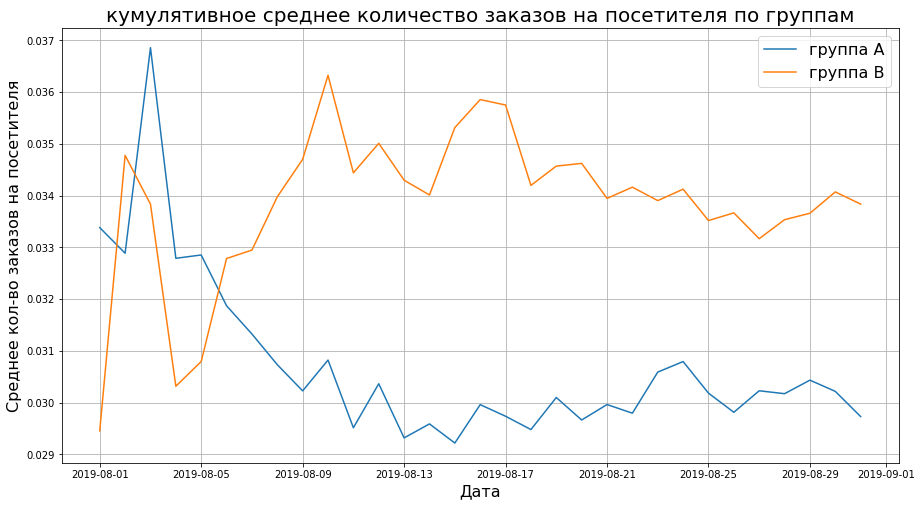

In [ ]:
# считаем среднее количество заказов на посетителя по группам - кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=[15, 8])
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='группа B')

plt.title('кумулятивное среднее количество заказов на посетителя по группам', fontsize=20)
plt.xlabel("Дата", fontsize=16)
plt.ylabel("Среднее кол-во заказов на посетителя", fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

### Вывод:
среднее количество заказов на посетителя по группам резко росло и падало в обеих группах, затем стабилизировалось для группы B выше чем для группы A

## 2.5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

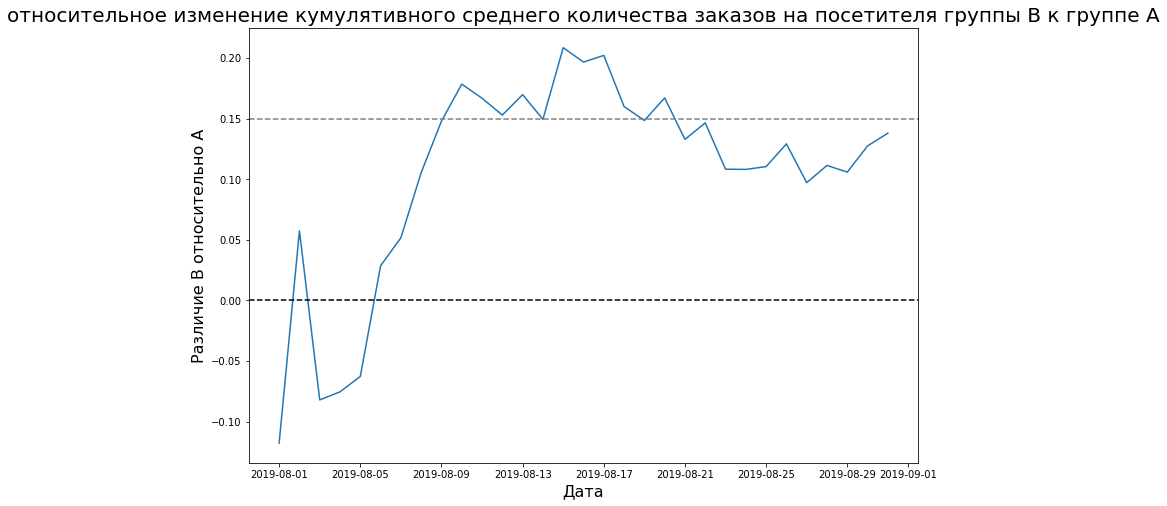

In [ ]:
# Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=[12,8])
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=20)
plt.xlabel("Дата", fontsize=16)
plt.ylabel("Различие B относительно A", fontsize=16)
plt.show()
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

### Вывод:
Наблюдаем, скачек, падение, и затем еще больший скачек относительной конверсии группы B по отношению к группе A. Похоже, что конверсия группы B стремится стабилизироваться на уровне на 15% лучше группы A.

## 2.6. Построим точечный график количества заказов по пользователям.

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


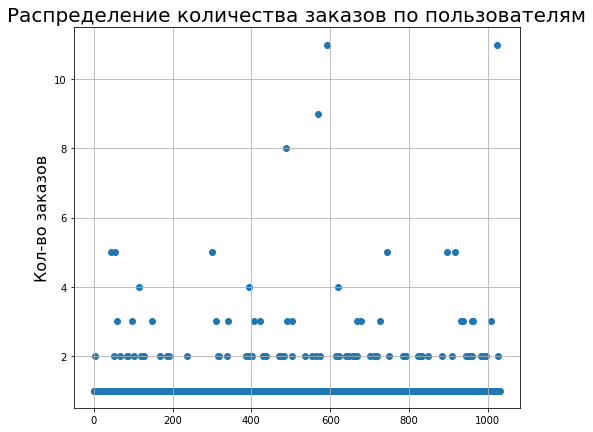

In [ ]:
# Построим точечный график количества заказов по пользователям.

# Для этого создадим датафрейм orders_by_visitors

orders_by_visitors = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_visitors.columns = ['visitorId', 'orders']

display(orders_by_visitors.sort_values(by='orders', ascending=False).head(10))

# строим график
plt.figure(figsize=[8,7])
x_values = pd.Series(range(0,len(orders_by_visitors['orders'])))
plt.scatter(x_values, orders_by_visitors['orders'])
plt.title('Распределение количества заказов по пользователям', fontsize=20)
plt.ylabel('Кол-во заказов', fontsize=16)
plt.grid(True)
plt.show()

### Вывод:
Видим, что большинство пользователей сделало по одному заказу, гораздо меньше по два, едницы сделали по 3 и 4, и есть выбросы в виде сделавших более 4 заказов

## 2.7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [ ]:
# Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

print(np.percentile(orders_by_visitors['orders'], [95, 99]))

[2. 4.]


### Вывод:
Так как 99% пользователей сделали 4 и менее заказов, определим границу аномалии по 99 перцентилю. Оставим данные о пользователях которые сделали 4 и менее заказа

## 2.8. Построим точечный график стоимостей заказов.

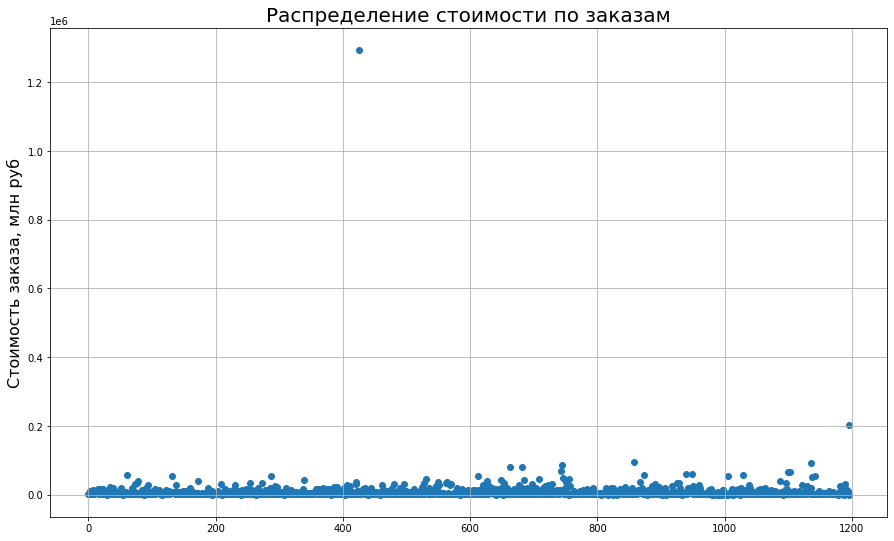

In [ ]:
# Построим точечный график стоимостей заказов.

plt.figure(figsize=[15,9])
x_values = pd.Series(range(0,len(orders['transactionId'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости по заказам', fontsize=20)
plt.ylabel('Стоимость заказа, млн руб', fontsize=16)
plt.grid(True)
plt.show()

### Вывод:
Наблюдаем два сильных выброса - заказы на 1.3 млн и на 200 тысяч. Остальные заказы расположились в зоне менее 100 тысяч.

## 2.9. Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [ ]:
# Посчитаем 95-й и 99-й перцентили стоимости заказов.

print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


### Вывод:
Видим, что 95% заказов оказались на сумму менее 28 тысяч. Выберем это значение в качестве границы аномальных значений.

## 2.10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

<div class = "alert alert-info" style="border-left: 7px solid blue">    

для этого cформулируем гипотезы (<b>тест 1</b>). <br>
- Нулевая: различий в среднем количестве заказов между группами нет. <br>
- Альтернативная: различия в среднем между группами есть.

В v1 гипотезы были сформулированы в ячейке ниже в комментах.</div>

In [ ]:
# Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя
# между группами по «сырым» данным.

# для этого cформулируем гипотезы.
# - Нулевая: различий в среднем количестве заказов между группами нет.
# - Альтернативная: различия в среднем между группами есть.


visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# visitorsPerDateA — количество пользователей в выбранную дату в группе A

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
# visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
# visitorsPerDateB — количество пользователей в выбранную дату в группе B

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
# visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# ordersPerDateA — количество заказов в выбранную дату в группе A
# revenuePerDateA — суммарная выручка в выбранную дату в группе A

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A
# revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A


ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
# ordersPerDateB — количество заказов в выбранную дату в группе B
# revenuePerDateB — суммарная выручка в выбранную дату в группе B

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# ordersCummulativeB — суммарное число заказов до выбранной даты включительно в группе B
# revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B


data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [ ]:
# Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
# Создадим переменные orders_by_visitors_A и orders_by_visitors_B со столбцами ['visitorId', 'orders'].
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

orders_by_visitors_A = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_visitors_A.columns = ['visitorId', 'orders']

orders_by_visitors_B = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_visitors_B.columns = ['visitorId', 'orders']


In [ ]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет
# соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

sampleA = pd.concat([orders_by_visitors_A['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(orders_by_visitors_A['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_visitors_B['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(orders_by_visitors_B['orders'])), name='orders')],axis=0)

# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.


print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


<div class = "alert alert-info" style="border-left: 7px solid blue">    
Немного запоздалое обоснование применения критея Мана-Уитни для теста 1<br>
    
    
С помощью критерия Шапиро проверим выборки на нормальное распределение.<br>
- Нулевая гипотеза - выборка распределена нормально.<br>
- Альтернативная гипотеза - выборка НЕ распределена нормально.<br>
     </div>

In [ ]:
stats.shapiro(sampleA), stats.shapiro(sampleB)

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.13177603483200073, pvalue=0.0),
 ShapiroResult(statistic=0.1508488655090332, pvalue=0.0))

<div class = "alert alert-info" style="border-left: 7px solid blue">   
p-value обоих выборок равны нулю, то есть отвергаем нулевую гипотезу, то есть выборка не распределена нормально. Можем применять критерий Манна-Уитни.    </div>

### Вывод:
По «сырым» данным различия в среднем числе заказов групп A и B есть.
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B равен 13.8% — второе число в выводе.

## 2.11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

<div class = "alert alert-info" style="border-left: 7px solid blue">    
Также определим гипотезы (<b>тест 2</b>):<br>
- Нулевая: различий в среднем чеке заказа между группами нет. <br>
- Альтернативная: различия в среднем чеке заказа между группами есть. </div>

In [ ]:
# Найдём относительные различия в среднем чеке между группами.
# Также с помощью критерия Манна-Уитни

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


### Вывод:
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. В исследовании выше мы видели, что средний чек был подвержен колебаниям, может быть дело в аномальных заказах.

<div class = "alert alert-info" style="border-left: 7px solid blue">    
Немного запоздалое обоснование применения критея Мана-Уитни для теста 2<br>
    
    
С помощью критерия Шапиро проверим выборки на нормальное распределение.<br>
- Нулевая гипотеза - выборка распределена нормально.<br>
- Альтернативная гипотеза - выборка НЕ распределена нормально.<br>
     </div>

In [ ]:
stats.shapiro(orders[orders['group']=='A']['revenue']), stats.shapiro(orders[orders['group']=='B']['revenue'])

(ShapiroResult(statistic=0.580496072769165, pvalue=1.739723833199812e-34),
 ShapiroResult(statistic=0.0856371521949768, pvalue=0.0))

<div class = "alert alert-info" style="border-left: 7px solid blue">   
p-value обоих выборок стемятся к нулю, то есть отвергаем нулевую гипотезу, то есть выборки не распределены нормально. Можем применять критерий Манна-Уитни.   </div>

## 2.12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 5 заказов (добавим их в usersWithManyOrders) или сделал заказы на сумму более 28000 (добавим в usersWithExpensiveOrders).

In [ ]:
usersWithManyOrders = pd.concat(
    [
        orders_by_visitors_A[orders_by_visitors_A['orders'] > 4]['visitorId'],
        orders_by_visitors_B[orders_by_visitors_B['orders'] > 4]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
59


59 аномальных пользователей.

Очистим данные от них и посчитаем
статистическую значимость различий в среднем количестве заказов на посетителя
с помощью критерия Манна-Уитни.

<div class = "alert alert-info" style="border-left: 7px solid blue">
Гипотезы сформулируем аналогичным образом (<b>тест 3</b>):<br>
- Нулевая: различий в среднем количестве заказов между группами нет. <br>
- Альтернативная: различия в среднем между группами есть.</div>

In [ ]:
sampleAFiltered = pd.concat(
    [
        orders_by_visitors_A[
            np.logical_not(orders_by_visitors_A['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_visitors_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        orders_by_visitors_B[
            np.logical_not(orders_by_visitors_B['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_visitors_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.018
0.145


### Вывод:
По «очищенным» данным различия в среднем числе заказов групп A и B есть. Первое число — p-value = 0.018 увеличилось по сравнению с результатом по "сырым" данным, однако все еще сильно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B еще сильнее увеличился и равен 14.5%.

## 2.13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

<div class = "alert alert-info" style="border-left: 7px solid blue">
Также определим гипотезы (<b>тест 4</b>):<br>
- Нулевая: различий в среднем чеке заказа между группами нет. <br>
- Альтернативная: различия в среднем чеке заказа между группами есть.</div>

In [ ]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)



0.961
-0.014


### Вывод:
P-value по очищенных данным еще увеличился и тем более больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. И аномальные пользователи и заказы здесь не играют роли. Средний чек остется на прежнем уровне.

## 2.14. Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

После внедрения изменений количество заказов в группе B показало рост,
Cредний чек в группах A и B остался на прежнем уровне.
В сумме эти два фактора дают увеличение выручки для интернет-магазина.
#### Принимаем решение остановить тест, зафиксировать победу группы B.

# Общие выводы по результатам исследования:

#### 2.1. По графику кумулятивной выручки по группам наблюдаем:
- выручка увеличивается в течение всего теста в обеих группах
- выручка группы B примерно с середины теста выручка больше
- на графиках присутствует резкий скачек в группе B районе 18-19 августа, возможно были аномальные скачки числа покупателей либо суммы покупок (нужно проверить выбросы в выборке)

#### 2.2. По графику кумулятивного среднего чека по группам видим
- средний чек для группы A становится равномерным после локального пика 2019-08-13
- средний чек для группы B делает очень большой скачек 2019-08-18, затем идет на снижение.
Возможно в этот период был аномально дорогой заказ. Возможно также, что средний чек для группы B еще не установился возле своего среднего значения.

#### 2.3. По графику относительного различия для среднего чека группы B к группе A
Видим, как средний чек группы B становится больше чем для группы A, затем падает обратно в зону меньше чем у группы A, затем резко возрастает и становится больше. Нельзя сказать, стабилировалось ли значение на данный момент и для какой группы средний чек выше.

#### 2.4. По графику кумулятивного среднего количества заказов на посетителя по группам.
среднее количество заказов на посетителя по группам резко росло и падало в обеих группах, затем стабилизировалось для группы B выше чем для группы A.

#### 2.5. По графику относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A наблюдаем:
скачек, затем падение, и затем еще больший скачек относительной конверсии группы B по отношению к группе A. Похоже, что конверсия группы B стремится стабилизироваться на уровне примерно на 15% лучше группы A.

#### 2.6. По точечному графику количества заказов по пользователям видим, что большинство пользователей сделало по одному заказу, гораздо меньше по два, едницы сделали по 3 и 4, и есть выбросы в виде сделавших более 4 заказов.

#### 2.7. Рассчитав 95-й и 99-й перцентили количества заказов на пользователя, видим:
- 99% пользователей сделали 4 и менее заказов, определим границу аномалии по 99 перцентилю.
Аномальными считаем данные о пользователях которые сделали более 4 заказов.

#### 2.8. По точечному графику стоимостей заказов наблюдаем два сильных выброса - заказы на 1.3 млн и на 200 тысяч. Остальные заказы расположились в зоне менее 100 тысяч.

#### 2.9. Посчитав 95-й и 99-й перцентили стоимости заказов, видим:
- 95% заказов оказались на сумму менее 28 тысяч.
Выберем это значение в качестве границы аномальных значений.

#### 2.10. Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
Для этого cформулировали гипотезы.
- Нулевая: различий в среднем количестве заказов между группами нет.
- Альтернативная: различия в среднем между группами есть. ✅

По «сырым» данным различия в среднем числе заказов групп A и B есть. Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B равен 13.8% — второе число в выводе.

#### 2.11. Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
cформулировали гипотезы:
- Нулевая: различий в среднем чеке заказа между группами нет. ✅
- Альтернативная: различия в среднем чеке заказа между группами есть.

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. В исследовании выше мы видели, что средний чек был подвержен колебаниям, может быть дело в аномальных заказах.

#### 2.12. Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
Приняли за аномальных пользователей тех, кто совершил от 5 заказов или сделал заказы на сумму более 28000.

cформулировали гипотезы:
- Нулевая: различий в среднем количестве заказов между группами нет.
- Альтернативная: различия в среднем между группами есть. ✅

По «очищенным» данным различия в среднем числе заказов групп A и B есть. Первое число — p-value = 0.018 увеличилось по сравнению с результатом по "сырым" данным, однако все еще сильно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный прирост группы B еще сильнее увеличился и равен 14.5%.

#### 2.13. Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

cформулировали гипотезы:
- Нулевая: различий в среднем чеке заказа между группами нет. ✅
- Альтернативная: различия в среднем чеке заказа между группами есть.

P-value по очищенных данным еще увеличился и тем более больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. И аномальные пользователи и заказы здесь не играют роли. Средний чек остется на прежнем уровне.

После внедрения изменений количество заказов в группе B показало рост,
Cредний чек в группах A и B остался на прежнем уровне.
В сумме эти два фактора дают увеличение выручки для интернет-магазина.
#### Принимаем решение остановить тест, зафиксировать победу группы B.